Директор заводу має намір відкрити дочірнє підприємство в одному із районних центрів області. Є можливість вибрати одне з міст: А, В, C та D (альтернативи). Як критерії вибору виступають: Вартість (К1), Дальність від обласного центру (К2), Місце розташування в райцентрі (К3) та наявність у райцентрі кваліфікованих співробітників (К4).

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

criteria_matrix = pd.read_excel('SATPR_2.xlsx', sheet_name='Матриця критеріїв', skiprows=2, usecols='B:E',nrows=4)

criteria_matrix


,Вартість,Дальність,Місце,Кваліфікація
0,1.000000,0.333333,0.29,0.2
1,3.000000,1.000000,0.25,0.5
2,3.448276,4.000000,1.00,2.0
3,5.000000,2.000000,0.50,1.0


In [16]:
def evaluations_matrix(df):
    df['A Score'] = df.apply(lambda row: gmean(row),axis=1)

    s = sum(df['A Score'])

    df['X'] = df['A Score']/s

evaluations_matrix(criteria_matrix)

criteria_matrix

,Вартість,Дальність,Місце,Кваліфікація,A Score,X
0,1.000000,0.333333,0.29,0.2,0.372887,0.075444
1,3.000000,1.000000,0.25,0.5,0.782542,0.158327
2,3.448276,4.000000,1.00,2.0,2.291780,0.463683
3,5.000000,2.000000,0.50,1.0,1.495349,0.302546


In [17]:
cost_matrix = pd.read_excel('SATPR_2.xlsx', sheet_name='Вартість', skiprows=2, usecols='B:E',nrows=4)

evaluations_matrix(cost_matrix)
cost_matrix

,A,B,C,D,A Score,X
0,1.0,2.000000,0.50,0.333333,0.759836,0.177965
1,0.5,1.000000,0.67,0.500000,0.639740,0.149837
2,2.0,1.492537,1.00,1.250000,1.389845,0.325522
3,3.0,2.000000,0.80,1.000000,1.480166,0.346677


In [18]:
range_matrix = pd.read_excel('SATPR_2.xlsx', sheet_name='Дальність', skiprows=2, usecols='B:E',nrows=4)
evaluations_matrix(range_matrix)
range_matrix

,A,B,C,D,A Score,X
0,1.000000,1.330000,0.670000,0.333333,0.738246,0.167988
1,0.751880,1.000000,0.670000,0.570000,0.732023,0.166572
2,1.492537,1.492537,1.000000,0.330000,0.925958,0.210702
3,3.000000,1.754386,3.030303,1.000000,1.998403,0.454738


In [19]:
place_matrix = pd.read_excel('SATPR_2.xlsx', sheet_name='Місце', skiprows=2, usecols='B:E',nrows=4)

evaluations_matrix(place_matrix)
place_matrix

,A,B,C,D,A Score,X
0,1.000000,0.500000,0.67,0.50,0.639740,0.145424
1,2.000000,1.000000,1.33,0.33,0.967941,0.220029
2,1.492537,0.751880,1.00,0.40,0.818528,0.186065
3,2.000000,3.030303,2.50,1.00,1.972941,0.448482


In [20]:
qualification_matrix = pd.read_excel('SATPR_2.xlsx', sheet_name='Кваліфікація', skiprows=2, usecols='B:E',nrows=4)

evaluations_matrix(qualification_matrix)
qualification_matrix

,A,B,C,D,A Score,X
0,1.000000,2.000000,1.330000,0.67,1.155418,0.271588
1,0.500000,1.000000,0.670000,0.40,0.605029,0.142216
2,0.751880,1.492537,1.000000,0.57,0.894308,0.210213
3,1.492537,2.500000,1.754386,1.00,1.599549,0.375984


In [49]:
final_matrix = pd.DataFrame()

final_matrix['Вартість'] = cost_matrix['X']
final_matrix['Дальність'] = range_matrix['X']
final_matrix['Місце'] = place_matrix['X']
final_matrix['Кваліфікація'] = qualification_matrix['X']
final_matrix['Priority vector'] = criteria_matrix['X']


final_matrix.index = ['A', 'B', 'C', 'D']

# result =  sum(final_matrix['Priority vector'] * final_matrix.loc['A'].values[:4])

for idx in final_matrix.index:
    final_matrix.loc[idx, 'Global priorities'] = sum(final_matrix['Priority vector'] * final_matrix.loc[idx].values[:4])
    

final_matrix

,Вартість,Дальність,Місце,Кваліфікація,Priority vector,Global priorities
A,0.177965,0.167988,0.145424,0.271588,0.075444,0.189622
B,0.149837,0.166572,0.220029,0.142216,0.158327,0.182728
C,0.325522,0.210702,0.186065,0.210213,0.463683,0.207793
D,0.346677,0.454738,0.448482,0.375984,0.302546,0.419858


In [54]:
print(final_matrix['Global priorities'].idxmax(), final_matrix['Global priorities'].max())

D 0.4198579159717045


<BarContainer object of 4 artists>

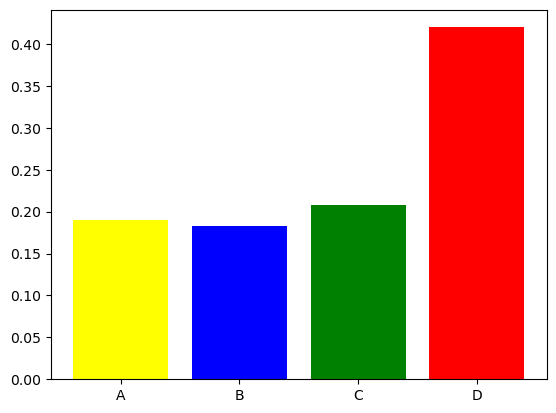

In [62]:
plt.bar(final_matrix.index, final_matrix['Global priorities'], color = ['yellow', 'blue', 'green', 'red'])